In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression-dataset-for-household-income-analysis/data.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [3]:
df = pd.read_csv('/kaggle/input/regression-dataset-for-household-income-analysis/data.csv')

>**Age: Age of the primary household member (18 to 70 years).**

>**Education Level: Highest education level attained (High School, Bachelor's, Master's, Doctorate).**

>**Occupation: Type of occupation (Healthcare, Education, Technology, Finance, Others).**

>**Number of Dependents: Number of dependents in the household (0 to 5).**

>**Location: Residential location (Urban, Suburban, Rural).**

>**Work Experience: Years of work experience (0 to 50 years).**

>**Marital Status: Marital status of the primary household member (Single, Married, Divorced).**

>**Employment Status: Employment status of the primary household member (Full-time, Part-time, Self-employed).**

>**Household Size: Total number of individuals living in the household (1 to 7).**

>**Homeownership Status: Homeownership status (Own, Rent).**

>**Type of Housing: Type of housing (Apartment, Single-family home, Townhouse).**

>**Gender: Gender of the primary household member (Male, Female).**

>**Primary Mode of Transportation: Primary mode of transportation used by the household member**
>**(Car, Public transit, Biking, Walking).**

>**Annual Household Income: Actual annual household income, derived from a combination of features**
>**with added noise. Unit USD**



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [5]:
df.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


In [6]:
df.shape

(10000, 14)

**Missing Value Check**

In [7]:
df.isnull().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

**Duplicate check**

In [8]:
df.duplicated().sum()

0

# **2. Data Visualization**

In [9]:
cat_cols = df.select_dtypes(exclude = ['int64','float64']).columns
num_cols = df.select_dtypes(include = ['int64','float64']).columns

In [10]:
num_cols

Index(['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size',
       'Income'],
      dtype='object')

**Histogram**

In [ ]:
f, ax = plt.subplots(3,2, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()   

**Count Plot**

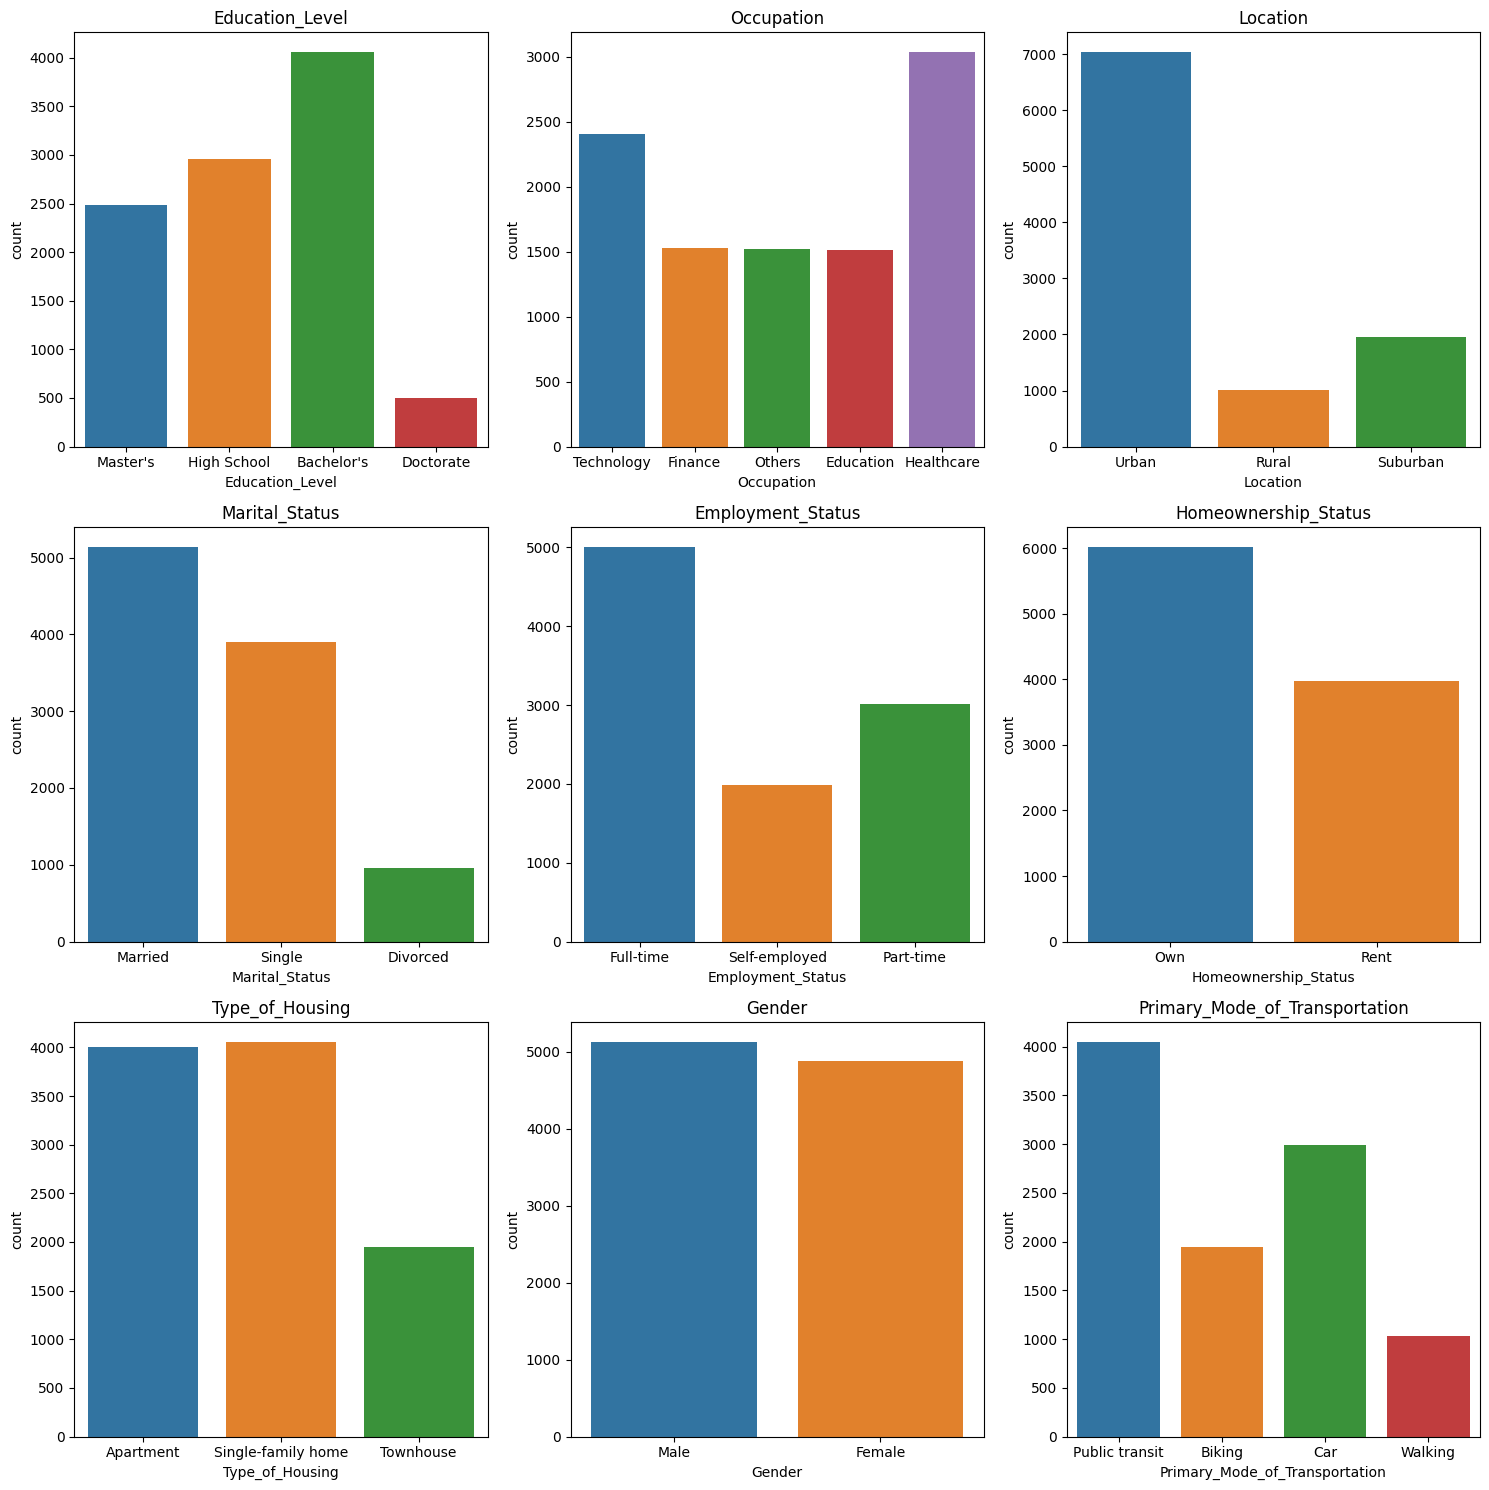

In [12]:
f, ax = plt.subplots(3,3 , figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= df, x= cols, ax = ax[index])
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

**Average Income by Gender**

In [13]:
income_gender = df.groupby(['Gender'])['Income'].mean().reset_index().sort_values(by = 'Income', ascending=False)

In [14]:
income_gender

,Gender,Income
0,Female,820978.331351
1,Male,812896.807535


In [15]:
px.bar(income_gender, x='Gender', y='Income', barmode = 'group', title = 'Average Income by Gender', text_auto = True, template='plotly')

**Average Income by Occupation**

In [16]:
income_Occupation = df.groupby(['Occupation'])['Income'].mean().reset_index().sort_values(by = 'Income', ascending=False)

In [17]:
income_Occupation

,Occupation,Income
0,Education,920816.752646
4,Technology,836173.786041
3,Others,828970.392505
2,Healthcare,799238.763097
1,Finance,706152.669508


In [18]:
px.bar(income_Occupation, x='Occupation', y='Income', barmode = 'group', title = 'Average Income by Occupation', text_auto = True, template='plotly')

**Average Income by Type_of_Housing**

In [19]:
income_type_of_housing = df.groupby(['Type_of_Housing'])['Income'].mean().reset_index().sort_values(by = 'Income', ascending=False)

In [20]:
income_type_of_housing

,Type_of_Housing,Income
0,Apartment,873187.825294
1,Single-family home,793627.046856
2,Townhouse,749279.579733


In [21]:
px.bar(income_type_of_housing, x='Type_of_Housing', y='Income', barmode = 'group', title = 'Average Income by Type_of_Housing', text_auto = True, template='plotly')

**Average Income by Employment_Status**

In [22]:
income_employment_status = df.groupby(['Employment_Status'])['Income'].mean().reset_index().sort_values(by = 'Income', ascending=False)

In [23]:
income_employment_status

,Employment_Status,Income
1,Part-time,905303.193966
0,Full-time,780894.959432
2,Self-employed,772923.665152


In [24]:
px.bar(income_employment_status, x='Employment_Status', y='Income', barmode = 'group', title = 'Average Income by Employment_Status', text_auto = True, template='plotly')

**Average Income by Education_Level**

In [25]:
income_education_level = df.groupby(['Education_Level'])['Income'].mean().reset_index().sort_values(by = 'Income', ascending=False)

In [26]:
income_education_level

,Education_Level,Income
2,High School,868667.401487
0,Bachelor's,812335.910793
3,Master's,800383.425866
1,Doctorate,628710.652695


In [27]:
px.bar(income_education_level, x='Education_Level', y='Income', barmode = 'group', title = 'Average Income by Employment_Status', text_auto = True, template='plotly')

**Correlation**

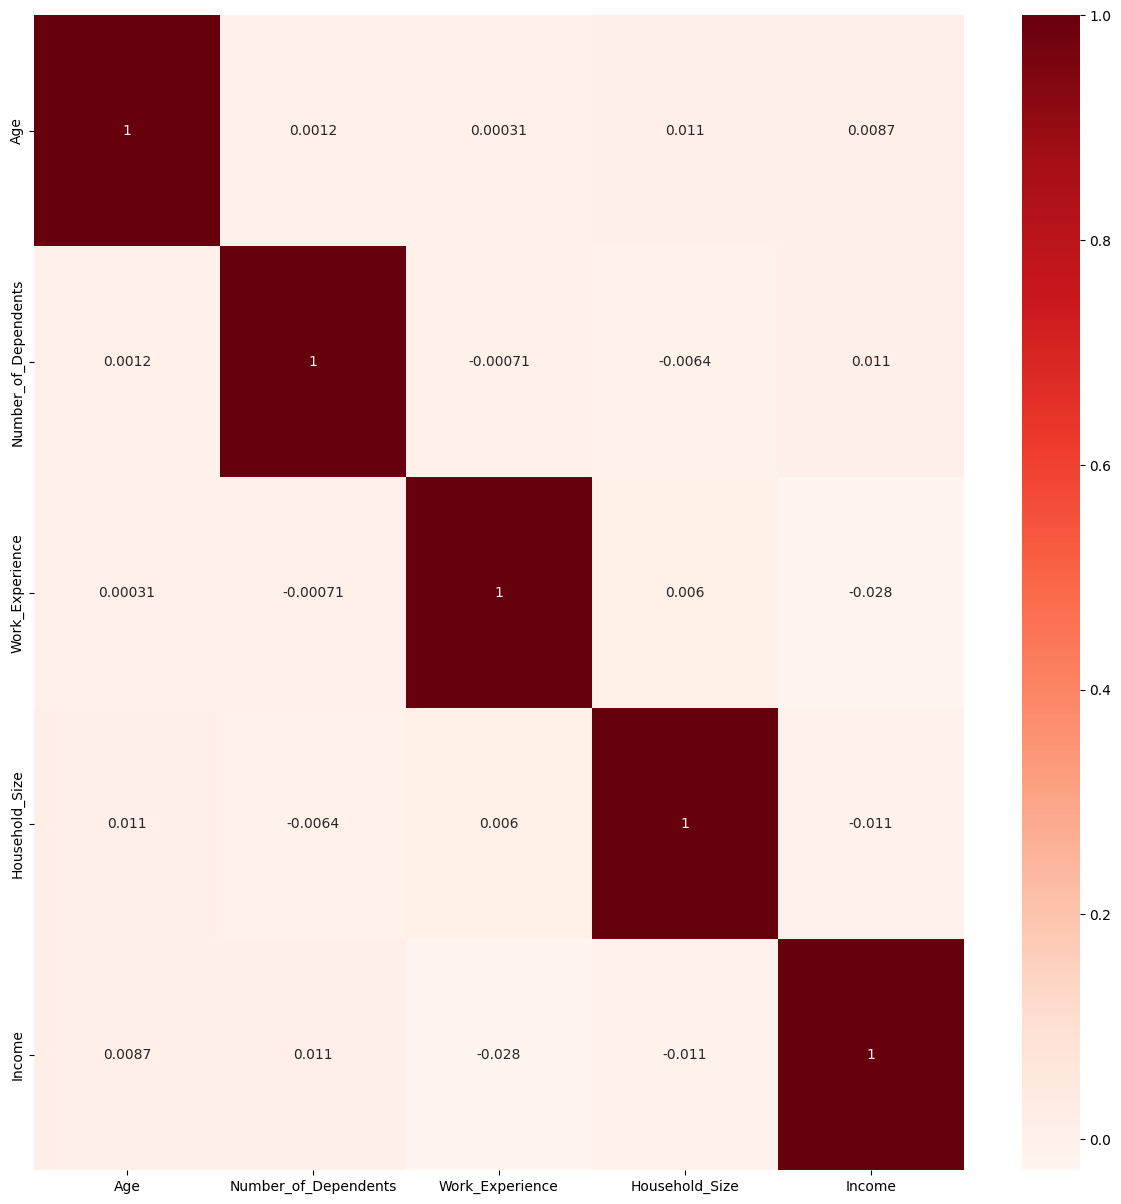

In [28]:
plt.subplots(figsize = (15,15))
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds')
plt.show()

# **3. Modeling**

In [29]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2024-06-17 10:58:24.978409: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 10:58:24.978529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 10:58:25.122114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Encoding**

In [30]:
label_encoder = LabelEncoder()

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

**MinMaxScalar**

In [31]:
data = df.values

scaler = MinMaxScaler()

data = scaler.fit_transform(data)

x = data[:, :-1]
y = data[:, -1]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
rfc = RandomForestRegressor()
gbc = GradientBoostingRegressor()
lnr = LinearRegression()
xgb = XGBRegressor()

models = [rfc, gbc, lnr, xgb]

names = ["Random Forest", "Gradient Boosting", 
         "Linear Regression", "XGBoost"]

**ML Model training**

In [34]:
index = 0
mse_ = []
r2_ = []
mae_ = []
for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f'{names[index]}')
    mse = mean_squared_error(pred, y_test)
    mae = mean_absolute_error(pred, y_test)
    r2 = r2_score(pred, y_test)
    mse_.append(mse)
    mae_.append(mae)
    r2_.append(r2)
    print("MSE: ", mse)
    print("MAE: ", mae)
    print("r2: ", r2)
    print("-"*50)
    
    index += 1

Random Forest
MSE:  0.03259038504923332
MAE:  0.11913799728947178
r2:  -6.586678326873112
--------------------------------------------------
Gradient Boosting
MSE:  0.031452002400167385
MAE:  0.11037043860941023
r2:  -30.824329203052475
--------------------------------------------------
Linear Regression
MSE:  0.03170623682631595
MAE:  0.11093489797266941
r2:  -98.67833295397159
--------------------------------------------------
XGBoost
MSE:  0.0359763302356006
MAE:  0.12346380385168382
r2:  -3.3234928605366996
--------------------------------------------------


In [35]:
reg_df = pd.DataFrame({'Model': names, 'MSE': mse_,'MAE': mae_ ,'R2 Score': r2_})
reg_df['MSE'] = round(reg_df['MSE'],4)
reg_df['MAE'] = round(reg_df['MAE'],4)

In [36]:
px.bar(reg_df , x= 'MSE', y = 'Model', text_auto = True,  title = 'Model MSE', orientation='h', template='plotly_dark')

In [37]:
px.bar(reg_df , x= 'MAE', y = 'Model', text_auto = True,  title = 'Model MAE', orientation='h', template='plotly_dark')

**ANN**

In [38]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [39]:
train_labels = train_dataset.pop('Income')
test_labels = test_dataset.pop('Income')

In [40]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [41]:
model = build_model()

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(
  train_dataset, train_labels,
  epochs=10, validation_split = 0.2, verbose=0)

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [45]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
5,3.786091e+12,779724.5625,3.786091e+12,3.518362e+12,743770.5000,3.518362e+12,5
6,3.687444e+12,811678.3750,3.687444e+12,3.421067e+12,784937.8125,3.421067e+12,6
7,3.583179e+12,857212.5625,3.583179e+12,3.327600e+12,840239.3750,3.327600e+12,7
8,3.490882e+12,914574.1875,3.490882e+12,3.255634e+12,901508.8125,3.255634e+12,8
9,3.425142e+12,975879.5000,3.425142e+12,3.209374e+12,965693.1875,3.209374e+12,9


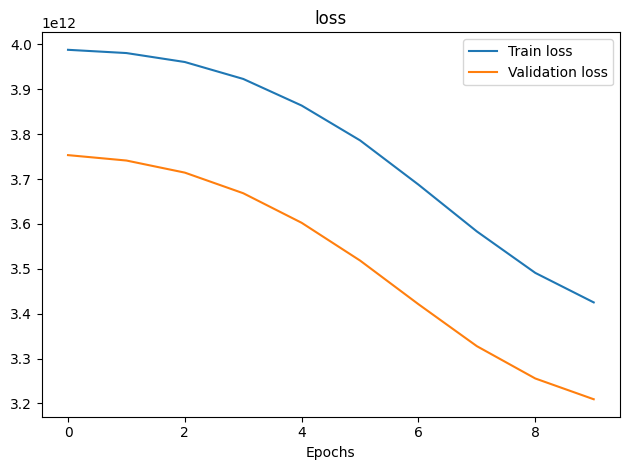

In [46]:
history_loss = model.history.history['loss']
history_val_loss = model.history.history['val_loss']

plt.title('loss')
plt.xlabel('Epochs')

sns.lineplot(data = history_loss, label = 'Train loss')
sns.lineplot(data = history_val_loss, label = 'Validation loss')

plt.tight_layout()
plt.show()

**Thankyou. Please leave your advice in the comments**